Original Dataset :


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II



Dataset after Label Encoding:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


Number of columns: 17

Shapes of Training and Testing Sets:


,Dataset,Shapes
0,X_train,"(1477, 16)"
1,y_train,"(1477,)"
2,X_test,"(634, 16)"
3,y_test,"(634,)"



Data Shapes:
x.shape: (2111, 16)
___________________

y.shape: (2111,)

Training Set (X_train, y_train):
X_train:
 [[ 1.       33.        1.85     ...  0.        2.        0.      ]
 [ 0.       21.529439  1.592379 ...  0.        3.        3.      ]
 [ 1.       23.        1.7425   ...  0.41322   2.        3.      ]
 ...
 [ 1.       21.        1.62     ...  0.        2.        3.      ]
 [ 0.       29.32038   1.642506 ...  0.        2.        0.      ]
 [ 1.       24.417552  1.774775 ...  0.449886  2.        3.      ]]
______________________________________________________________________

y_train:
 [1 0 2 ... 5 5 3]
***********************************************************************


Testing Set (X_test, y_test):
X_test:
 [[ 1.       30.595632  1.910672 ...  0.173232  2.        3.      ]
 [ 0.       18.        1.67     ...  1.        2.        3.      ]
 [ 1.       29.153907  1.773656 ...  0.370067  3.        0.      ]
 ...
 [ 1.       36.839761  1.74285  ...  0.        3.        

,Algorithm,Accuracy,precision,Recall,F1-Score
0,RandomForestClassifier,0.958991,0.960918,0.958991,0.958969
1,SVM,0.750789,0.739661,0.750789,0.739962
2,DecisionTree,0.935331,0.934854,0.935331,0.934841
3,GaussianNB,0.608833,0.619690,0.608833,0.557413


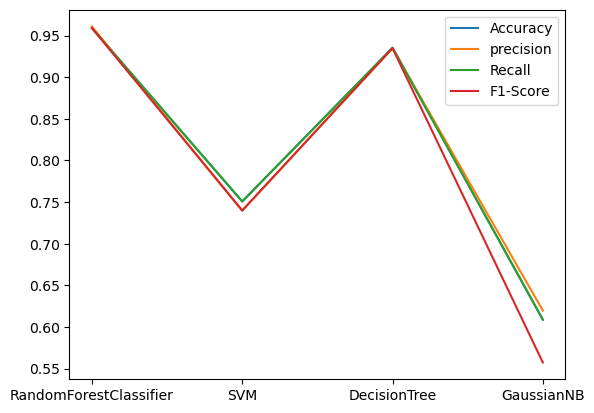

In [3]:
# Import libraries
import numpy as np
import pandas as pd
 # Import functions
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from IPython.display import display
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score,precision_recall_fscore_support
# Import metrics
from sklearn import metrics

 # Import Algorithms
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


 # Read the dataset from a CSV file
ds = pd.read_csv(r"C:\Users\farah\Desktop\ObesityData.csv")
# Display the original dataset
print("Original Dataset :")
display(ds.head())

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns to apply label encoding
columns_to_encode =['SMOKE','SCC','family_history_with_overweight','Gender','FAVC','MTRANS','CALC','CAEC','NObeyesdad']

 # Apply label encoding to the specified columns
for column in columns_to_encode:
    ds[column] = label_encoder.fit_transform(ds[column])
    
       
 # Display the dataset after label encoding
print("\nDataset after Label Encoding:")
display(ds.head())


num_columns = len(ds.columns)
print("Number of columns:", num_columns)



 # Extract features (X) and target variable (y) from the Dataset
x = ds.iloc[:, :-1].values
y = ds.iloc[:,-1].values

 # Display the shapes of x and y
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=0) 



# Create a DataFrame to display the shapes
shapes_data = {
    'Dataset': ['X_train', 'y_train', 'X_test', 'y_test'],
    'Shapes': [X_train.shape, y_train.shape, X_test.shape, y_test.shape]
}

shapes_ds=pd.DataFrame(shapes_data)


# Display the DataFrame
print("\nShapes of Training and Testing Sets:")
display(shapes_ds)


print("\nData Shapes:")
print("x.shape:", x.shape)
print("___________________\n")
print("y.shape:", y.shape)


# Display a few samples from the training and testing sets
print("\nTraining Set (X_train, y_train):")
print("X_train:\n",X_train)
print("______________________________________________________________________\n")
print("y_train:\n",y_train)
print("***********************************************************************\n")
print("\nTesting Set (X_test, y_test):")
print("X_test:\n",X_test)
print("______________________________________________________________________\n")
print("y_test:\n",y_test)
print("______________________________________________________________________\n")



 #differences between classes distribution in y_train and y_test
print("Class distribution in y_train:")
print(np.bincount(y_train))
print("\nClass distribution in y_test:")
print(np.bincount(y_test))


model1=RandomForestClassifier(max_depth=10,random_state=0)
model2=svm.LinearSVC(dual=False)
model3=DecisionTreeClassifier(random_state=0) 
model4=GaussianNB()



 # Define columns for the final DataFrame
columns = ['RandomForestClassifier','SVM','DecisionTree','GaussianNB']


 # Initialize lists to store performance metrics
result1 = [] # List to store accuracy scores
result2 = [] # List to store precision scores
result3 = [] # List to store recall scores
result4 = [] # List to store F1 scores



 #________________________________________________________________________
 #Function to train the model, make predictions, and evaluate its performance
def call(model):
    model.fit(X_train, y_train)
    pre = model.predict(X_test)
    y_t = y_test
    y_p = pre
    
 # Evaluate the model and store the metrics
    accurecy = accuracy_score(y_t, y_p)
    recall = recall_score(y_t, y_p, average='weighted')
    precision = precision_score(y_t, y_p, average='weighted')
    f1 = f1_score(y_t, y_p, average='weighted')
    
 # Append metrics to the result lists
    result1.append(accurecy)
    result2.append(precision)
    result3.append(recall)
    result4.append(f1)
    
    algorithm_name = type(model).__name__ # Get algorithm name dynamically
    
    print(f"\n\n\n\n Classification Report for {algorithm_name}:\n")
    
    print(classification_report(y_t, y_p))
    
# Call the function for each model
call(model1)
call(model2)
call(model3)
call(model4)

 #________________________________________________________________________

 # Create a DataFrame with 'Algorithm' and 'Classification Report' columns
FinalResult = pd.DataFrame({'Algorithm': columns,'Accuracy': result1,'precision':result2,'Recall': result3, 'F1-Score':
                            result4})
 # Display the DataFrame
display(FinalResult)


import matplotlib.pyplot as plt
plt.plot(FinalResult.Algorithm,result1,label="Accuracy")
plt.plot(FinalResult.Algorithm,result2,label="precision")
plt.plot(FinalResult.Algorithm,result3,label="Recall")
plt.plot(FinalResult.Algorithm,result4,label="F1-Score")
plt.legend()
plt.show()




